<a href="https://colab.research.google.com/github/MeriamKalekye/data-science/blob/main/DATA_EXTRACTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Define the Problematic and the Goals**
## **Problem Statement:**
Telco companies often face customer churn, which is expensive and can impact revenue. The goal is to predict customer churn (binary classification) based on customer behavior and service usage data.

## **Goals:**

- Minimize customer churn by identifying potential churners early.
- Improve predictive accuracy with a robust machine-learning model.
- Compare and optimize performance across various algorithms.

# **Step 2: Identify and Collect Data**
Explore the dataset using Pandas to understand column details and data types.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Assuming the file is uploaded
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data.info())
print(data.describe())


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  C

# **Step 2: Data Preparation**
In this step, we focus on ensuring that the data is ready for use in the machine learning model. This includes cleaning the data, normalizing numerical variables, encoding categorical features, and visualizing data distributions.

## **1. Cleaning Data and Managing Missing Values**

- The dataset doesn't have missing values as per the output you provided. Therefore, no additional steps for handling missing data are required.
- Proceed to cleaning the data

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.columns = data.columns.str.strip()

In [15]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [16]:
if 'customerID' in data.columns:
    data = data.drop(columns=['customerID'])
else:
    print("customerID column not found.")

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
data.isnull().sum()  # Check for missing values

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [19]:
# Check for non-numeric values in the relevant columns
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = data[['tenure', 'MonthlyCharges', 'TotalCharges']].apply(pd.to_numeric, errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill any remaining NaNs after conversion with the median
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = data[['tenure', 'MonthlyCharges', 'TotalCharges']].fillna(data[['tenure', 'MonthlyCharges', 'TotalCharges']].median())


In [20]:
# Inspect the first few rows of the relevant columns
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].head())

# Check for any remaining NaN values
print("\nRemaining missing values:")
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].isnull().sum())

# Display summary statistics to confirm the data range
print("\nSummary statistics:")
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

   tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65

Remaining missing values:
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

Summary statistics:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


In [22]:
print(data['TotalCharges'].dtype)

float64


In [23]:
data.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


# **2. Normalization**
Normalize numerical features like tenure, MonthlyCharges, and TotalCharges for better performance during model training.
- **Normalization:** Numerical features like tenure, MonthlyCharges, and TotalCharges might require normalization. This is especially important when using algorithms like neural networks, which can perform better with normalized data. We will use **StandardScaler** or **MinMaxScaler** from scikit-learn to scale the numerical features.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [25]:
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean      0.449599        0.462803      0.261149
std       0.341104        0.299403      0.261397
min       0.000000        0.000000      0.000000
25%       0.125000        0.171642      0.044245
50%       0.402778        0.518408      0.159090
75%       0.763889        0.712438      0.434780
max       1.000000        1.000000      1.000000


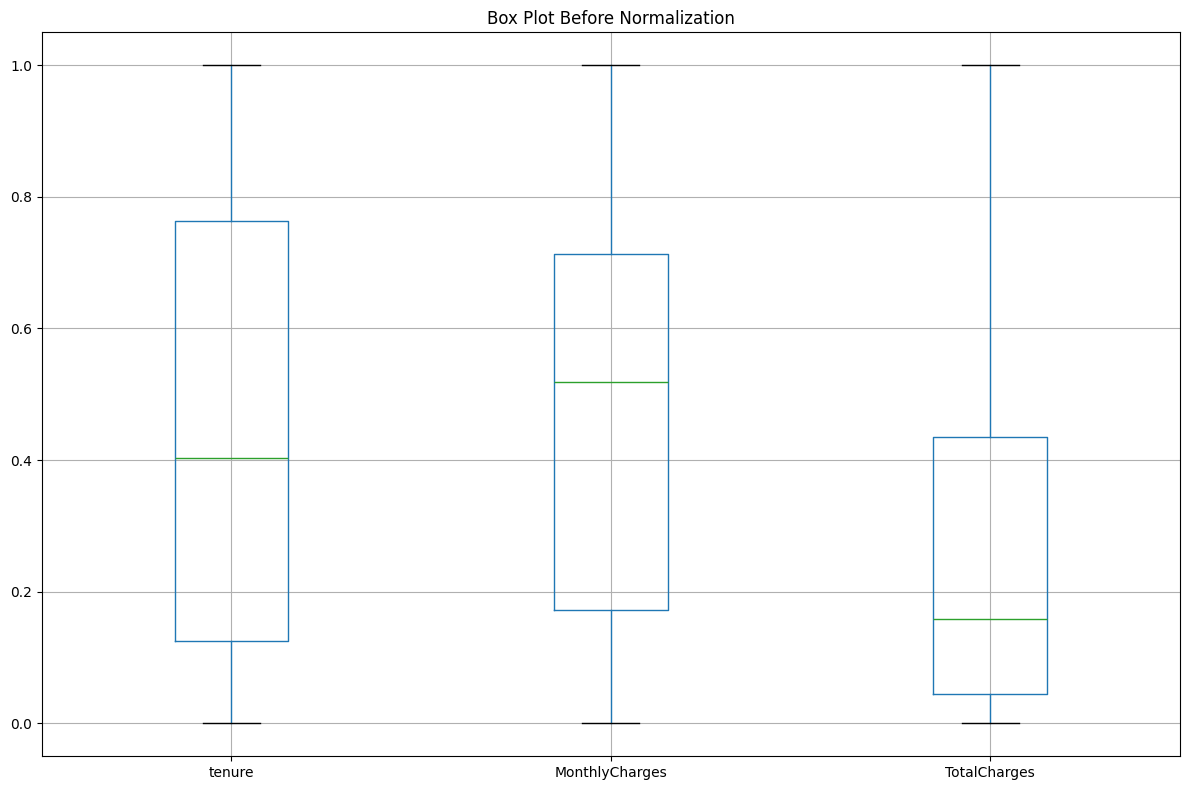

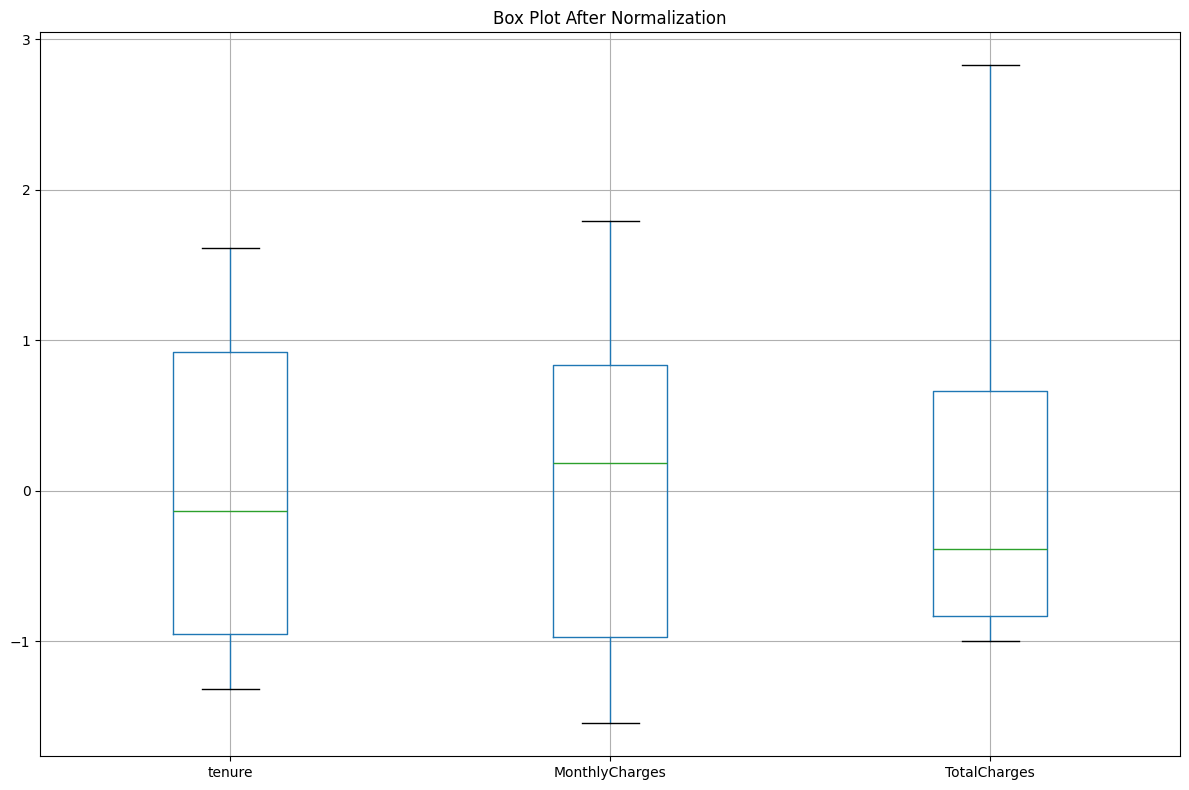

In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Box plot before normalization
data[['tenure', 'MonthlyCharges', 'TotalCharges']].boxplot(figsize=(12, 8))
plt.title('Box Plot Before Normalization')
plt.tight_layout()
plt.show()

# 2. Normalize the data
scaler = StandardScaler()
normalized_data = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
normalized_data = scaler.fit_transform(normalized_data)

# 3. Box plot after normalization
normalized_df = pd.DataFrame(normalized_data, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
normalized_df.boxplot(figsize=(12, 8))
plt.title('Box Plot After Normalization')
plt.tight_layout()
plt.show()

## **3. Encoding Categorical Variables:**

- Many features in the dataset are categorical (e.g., gender, Partner, InternetService). These need to be encoded into numerical values.
- **Label Encoding**: For binary categorical features (like SeniorCitizen), you can use **LabelEncoder.**
- **One-Hot Encoding:** For multi-class categorical features (e.g., Contract, PaymentMethod), we will use **OneHotEncoder.**

In [27]:
# Check the current columns to make sure 'Churn' isn't already encoded
print(data.columns)

# Apply OneHotEncoding for the 'Churn' column if it still exists (before previous encoding)
# If the column is already encoded as 'Churn_Yes', skip this step.
if 'Churn' in data.columns:
    data = pd.get_dummies(data, columns=['Churn'], drop_first=True)

# Now, apply One-Hot Encoding for other categorical variables
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                       'PaymentMethod']

# One-Hot Encoding transformation for these categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check the result
print(data.head())

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn_Yes  \
0              0  0.013889        0.115423      0.001275      False   
1              0  0.472222        0.385075      0.215867      False   
2              0  0.027778        0.354229      0.010310       True   
3              0  0.625000        0.239303      0.210241      False   
4              0  0.027778        0.521891      0.015330       True   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False         True           False             False   
1         True        False           False              True   
2         T

In [28]:
data.dtypes


,0
SeniorCitizen,int64
tenure,float64
MonthlyCharges,float64
TotalCharges,float64
Churn_Yes,bool
gender_Male,bool
Partner_Yes,bool
Dependents_Yes,bool
PhoneService_Yes,bool
MultipleLines_No phone service,bool


In [29]:
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean      0.449599        0.462803      0.261149
std       0.341104        0.299403      0.261397
min       0.000000        0.000000      0.000000
25%       0.125000        0.171642      0.044245
50%       0.402778        0.518408      0.159090
75%       0.763889        0.712438      0.434780
max       1.000000        1.000000      1.000000


In [30]:
data.isnull().sum()  # Check for missing values

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0
Churn_Yes,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No phone service,0


# **Step 3: Splitting the Dataset**
## **Why Splitting the Dataset is Important**
In machine learning, splitting the dataset into training, validation, and test sets is a crucial step. This ensures the model's performance is evaluated on unseen data, helping us understand its generalization capability.

- **Training Set:** Used to train the model.(80%)
- **Test Set:** Used to evaluate the final model's performance.(20%)

In [31]:
from sklearn.model_selection import train_test_split

X = data.drop('Churn_Yes', axis=1)  # Features
y = data['Churn_Yes']  # Labels

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 4: Build the Model:**
We’ll use TensorFlow/Keras to build a neural network model. We will create a simple feedforward neural network for binary classification (Churn prediction).

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the model
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Step 2: Train the Model**
We will apply class imbalance with SMOTE, parameter tuning and cross-validation for a robust model.

In [35]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Handle class imbalance with SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Convert to DataFrame for correct indexing
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)  # Assuming X_train has column names
X_test = pd.DataFrame(X_test, columns=X_train.columns)  # Same for X_test

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost with adjusted class weights
scale_pos_weight = len(y_train_res) / sum(y_train_res)
params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'scale_pos_weight': scale_pos_weight
}

# Cross-validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
for train_index, val_index in kf.split(X_train_res, y_train_res):
    X_train_fold, X_val_fold = X_train_res.iloc[train_index], X_train_res.iloc[val_index]  # Use .iloc to index rows
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]  # Same for y_train

    # Train the model
    model = xgb.train(params, xgb.DMatrix(X_train_fold, label=y_train_fold), num_boost_round=100)

    # Predict and evaluate
    y_pred = model.predict(xgb.DMatrix(X_val_fold)) > 0.5
    print(f"Fold {fold_no} classification report:")
    print(classification_report(y_val_fold, y_pred))
    fold_no += 1


Fold 1 classification report:
              precision    recall  f1-score   support

       False       0.90      0.67      0.77       828
        True       0.74      0.92      0.82       828

    accuracy                           0.80      1656
   macro avg       0.82      0.80      0.80      1656
weighted avg       0.82      0.80      0.80      1656

Fold 2 classification report:
              precision    recall  f1-score   support

       False       0.90      0.69      0.78       828
        True       0.75      0.92      0.83       827

    accuracy                           0.81      1655
   macro avg       0.82      0.81      0.80      1655
weighted avg       0.82      0.81      0.80      1655

Fold 3 classification report:
              precision    recall  f1-score   support

       False       0.88      0.68      0.77       828
        True       0.74      0.91      0.82       827

    accuracy                           0.80      1655
   macro avg       0.81      0.80     

# **Step 5: Model Evaluation:**
After training the model, we evaluate its performance on the **test set**.

- **1. Performance Metrics Calculation:**
The essential performance metrics for classification tasks are **precision, recall, F1-score, and accuracy**. These metrics provide insight into how well the model is classifying positive and negative classes.

- **2. Using ROC Curve**  to evaluate the performance of the model across various decision thresholds, which is especially useful for handling class imbalances and comparing model performance without being biased by accuracy alone.

Fold 1 classification report:
              precision    recall  f1-score   support

       False       0.90      0.67      0.77       828
        True       0.74      0.93      0.82       828

    accuracy                           0.80      1656
   macro avg       0.82      0.80      0.80      1656
weighted avg       0.82      0.80      0.80      1656

Fold 2 classification report:
              precision    recall  f1-score   support

       False       0.88      0.69      0.78       828
        True       0.75      0.91      0.82       827

    accuracy                           0.80      1655
   macro avg       0.81      0.80      0.80      1655
weighted avg       0.81      0.80      0.80      1655

Fold 3 classification report:
              precision    recall  f1-score   support

       False       0.89      0.69      0.78       828
        True       0.75      0.92      0.82       827

    accuracy                           0.81      1655
   macro avg       0.82      0.81     

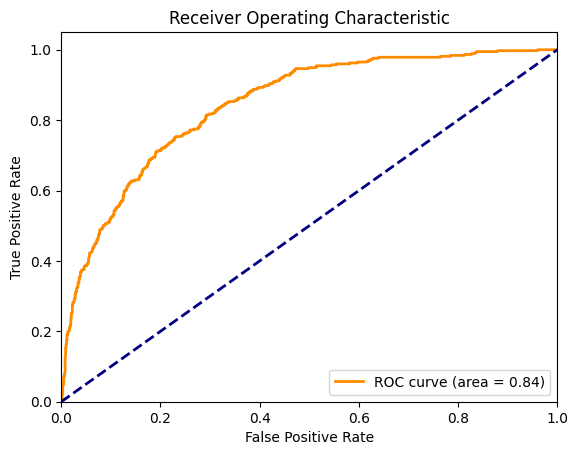

In [36]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Handle class imbalance with SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost with adjusted class weights
scale_pos_weight = len(y_train_res) / sum(y_train_res)
params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'scale_pos_weight': scale_pos_weight
}

# Cross-validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracies = []
roc_auc_scores = []

for train_index, val_index in kf.split(X_train_res, y_train_res):
    # Use .iloc to index by integer position
    X_train_fold, X_val_fold = X_train_res.iloc[train_index], X_train_res.iloc[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    # Train the model
    model = xgb.train(params, xgb.DMatrix(X_train_fold, label=y_train_fold), num_boost_round=100)

    # Predict and evaluate
    y_pred = model.predict(xgb.DMatrix(X_val_fold)) > 0.5
    accuracy = accuracy_score(y_val_fold, y_pred)
    roc_auc = roc_auc_score(y_val_fold, model.predict(xgb.DMatrix(X_val_fold)))

    accuracies.append(accuracy)
    roc_auc_scores.append(roc_auc)

    print(f"Fold {fold_no} classification report:")
    print(classification_report(y_val_fold, y_pred))
    fold_no += 1

# Average performance metrics across folds
print(f"\nAverage Accuracy: {sum(accuracies)/len(accuracies):.4f}")
print(f"Average ROC AUC: {sum(roc_auc_scores)/len(roc_auc_scores):.4f}")

# Visualizing ROC curve for the final model
y_pred_final = model.predict(xgb.DMatrix(X_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_final)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()